# Tarea 4: Programación
**García Fierros Nicky**

## Instrucciones generales
Crea un programa para dibujar lo que se indica.

In [1]:
using Luxor, ColorSchemes
include("src/LuxorUtils.jl")
include("src/Reticles.jl")
include("src/LuxorPoints.jl")
include("src/Circle.jl")
include("src/LuxorCircle.jl")
include("src/MobiusTransformationV2.jl")
include("src/LuxorOrbits.jl")
include("src/SchottkyGroups.jl")
include("src/AlgorithmsBFS.jl")
include("src/AlgorithmsBFS.jl")

drawSchottkyarraysBFS (generic function with 1 method)

## Ejercicio 1

Sean $C_1 : \vert z−2−2i\vert  = 2$, $C_2 : \vert z+2−2i\vert  = 18/10$, $C_3 : \vert z+2+2i\vert  = 2$, $C_4 : \vert z − 2 + 2i\vert  = 18/10$. 
Crea grupos de Schottky que emparejen $C_\mathtt{A}$ con $C_\mathtt{a}$ y $C_\mathtt{B}$ con $C_\mathtt{b}$, y dibuja la órbita de los discos $D_\mathtt{a}$, $D_\mathtt{A}$, $D_\mathtt{b}$ y $D_\mathtt{B}$, donde:

  1. $C_\mathtt{A} = C_1, C_\mathtt{a} = C_3, C_\mathtt{B} = C_2$ y $C_\mathtt{b} = C_4$.
  2. $C_\mathtt{A} = C_1, C_\mathtt{a} = C_2, C_\mathtt{B} = C_3$ y $C_\mathtt{b} = C_4$.
  3. $C_\mathtt{A} = C_1, C_\mathtt{a} = C_2, C_\mathtt{B} = C_4$ y $C_\mathtt{b} = C_3$.

### Solución

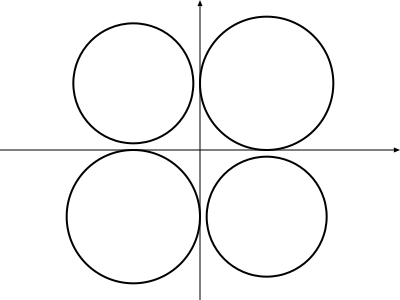

In [2]:
C1 = Circ(2+2im, 2)
C2 = Circ(-2+2im, 18/10)
C3 = Circ(-2-2im, 2)
C4 = Circ(2-2im, 18/10)

circulos = [C1, C2, C3, C4]

w = 400
h = 300
@draw begin
    configurecanvas(-6, 6, -4.5, 4.5, width=w, height=h)
    drawcircle.(circulos)
end w h

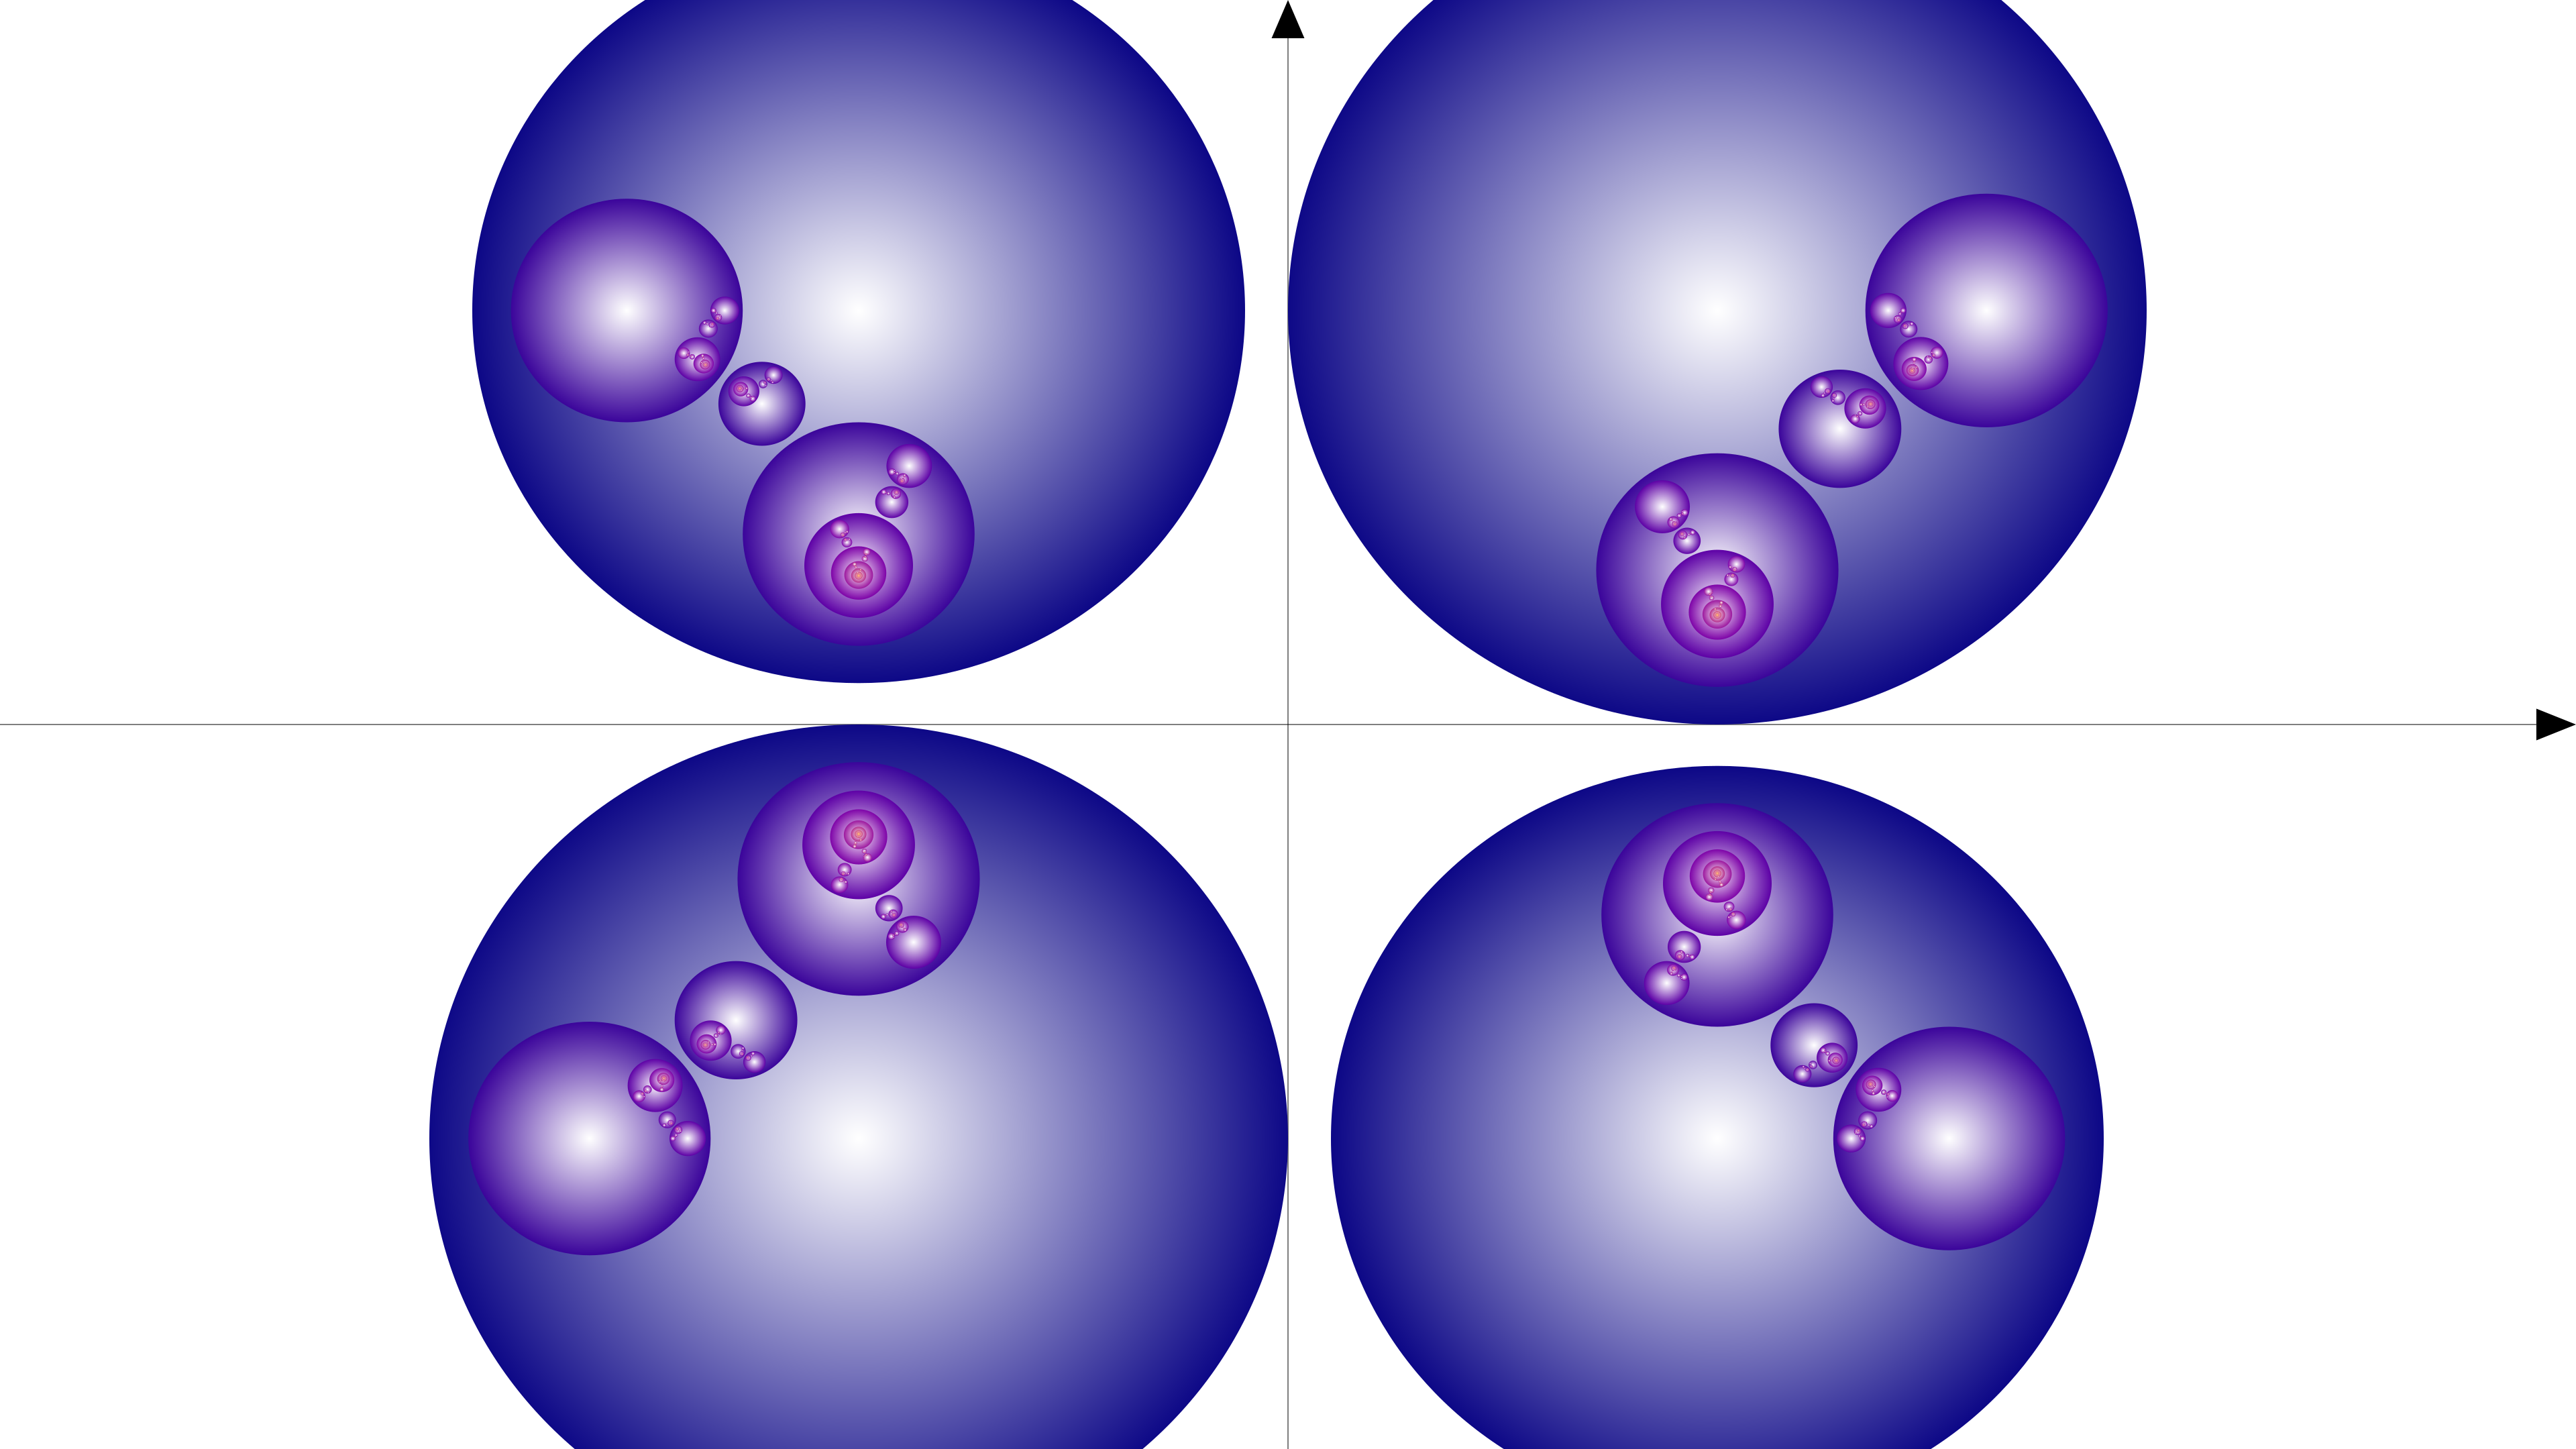

In [3]:
w, h = 3840, 2160

###################### Inciso 1 ######################
CA, Ca, CB, Cb = C1, C3, C2, C4

## Obteniendo los generados

a = createSchottkyGen(CA, Ca)
b = createSchottkyGen(CB, Cb)
A = inverse(a)
B = inverse(b)

## Dibujamos
@draw begin
    configurecanvas(-6, 6, -3.5, 3.5, width=w, height=h)
    drawSchottkyarraysBFS([a,b], [Ca,Cb,CA,CB], N=12, ε=0.0005, colormap=colorschemes[:plasma])
end w h

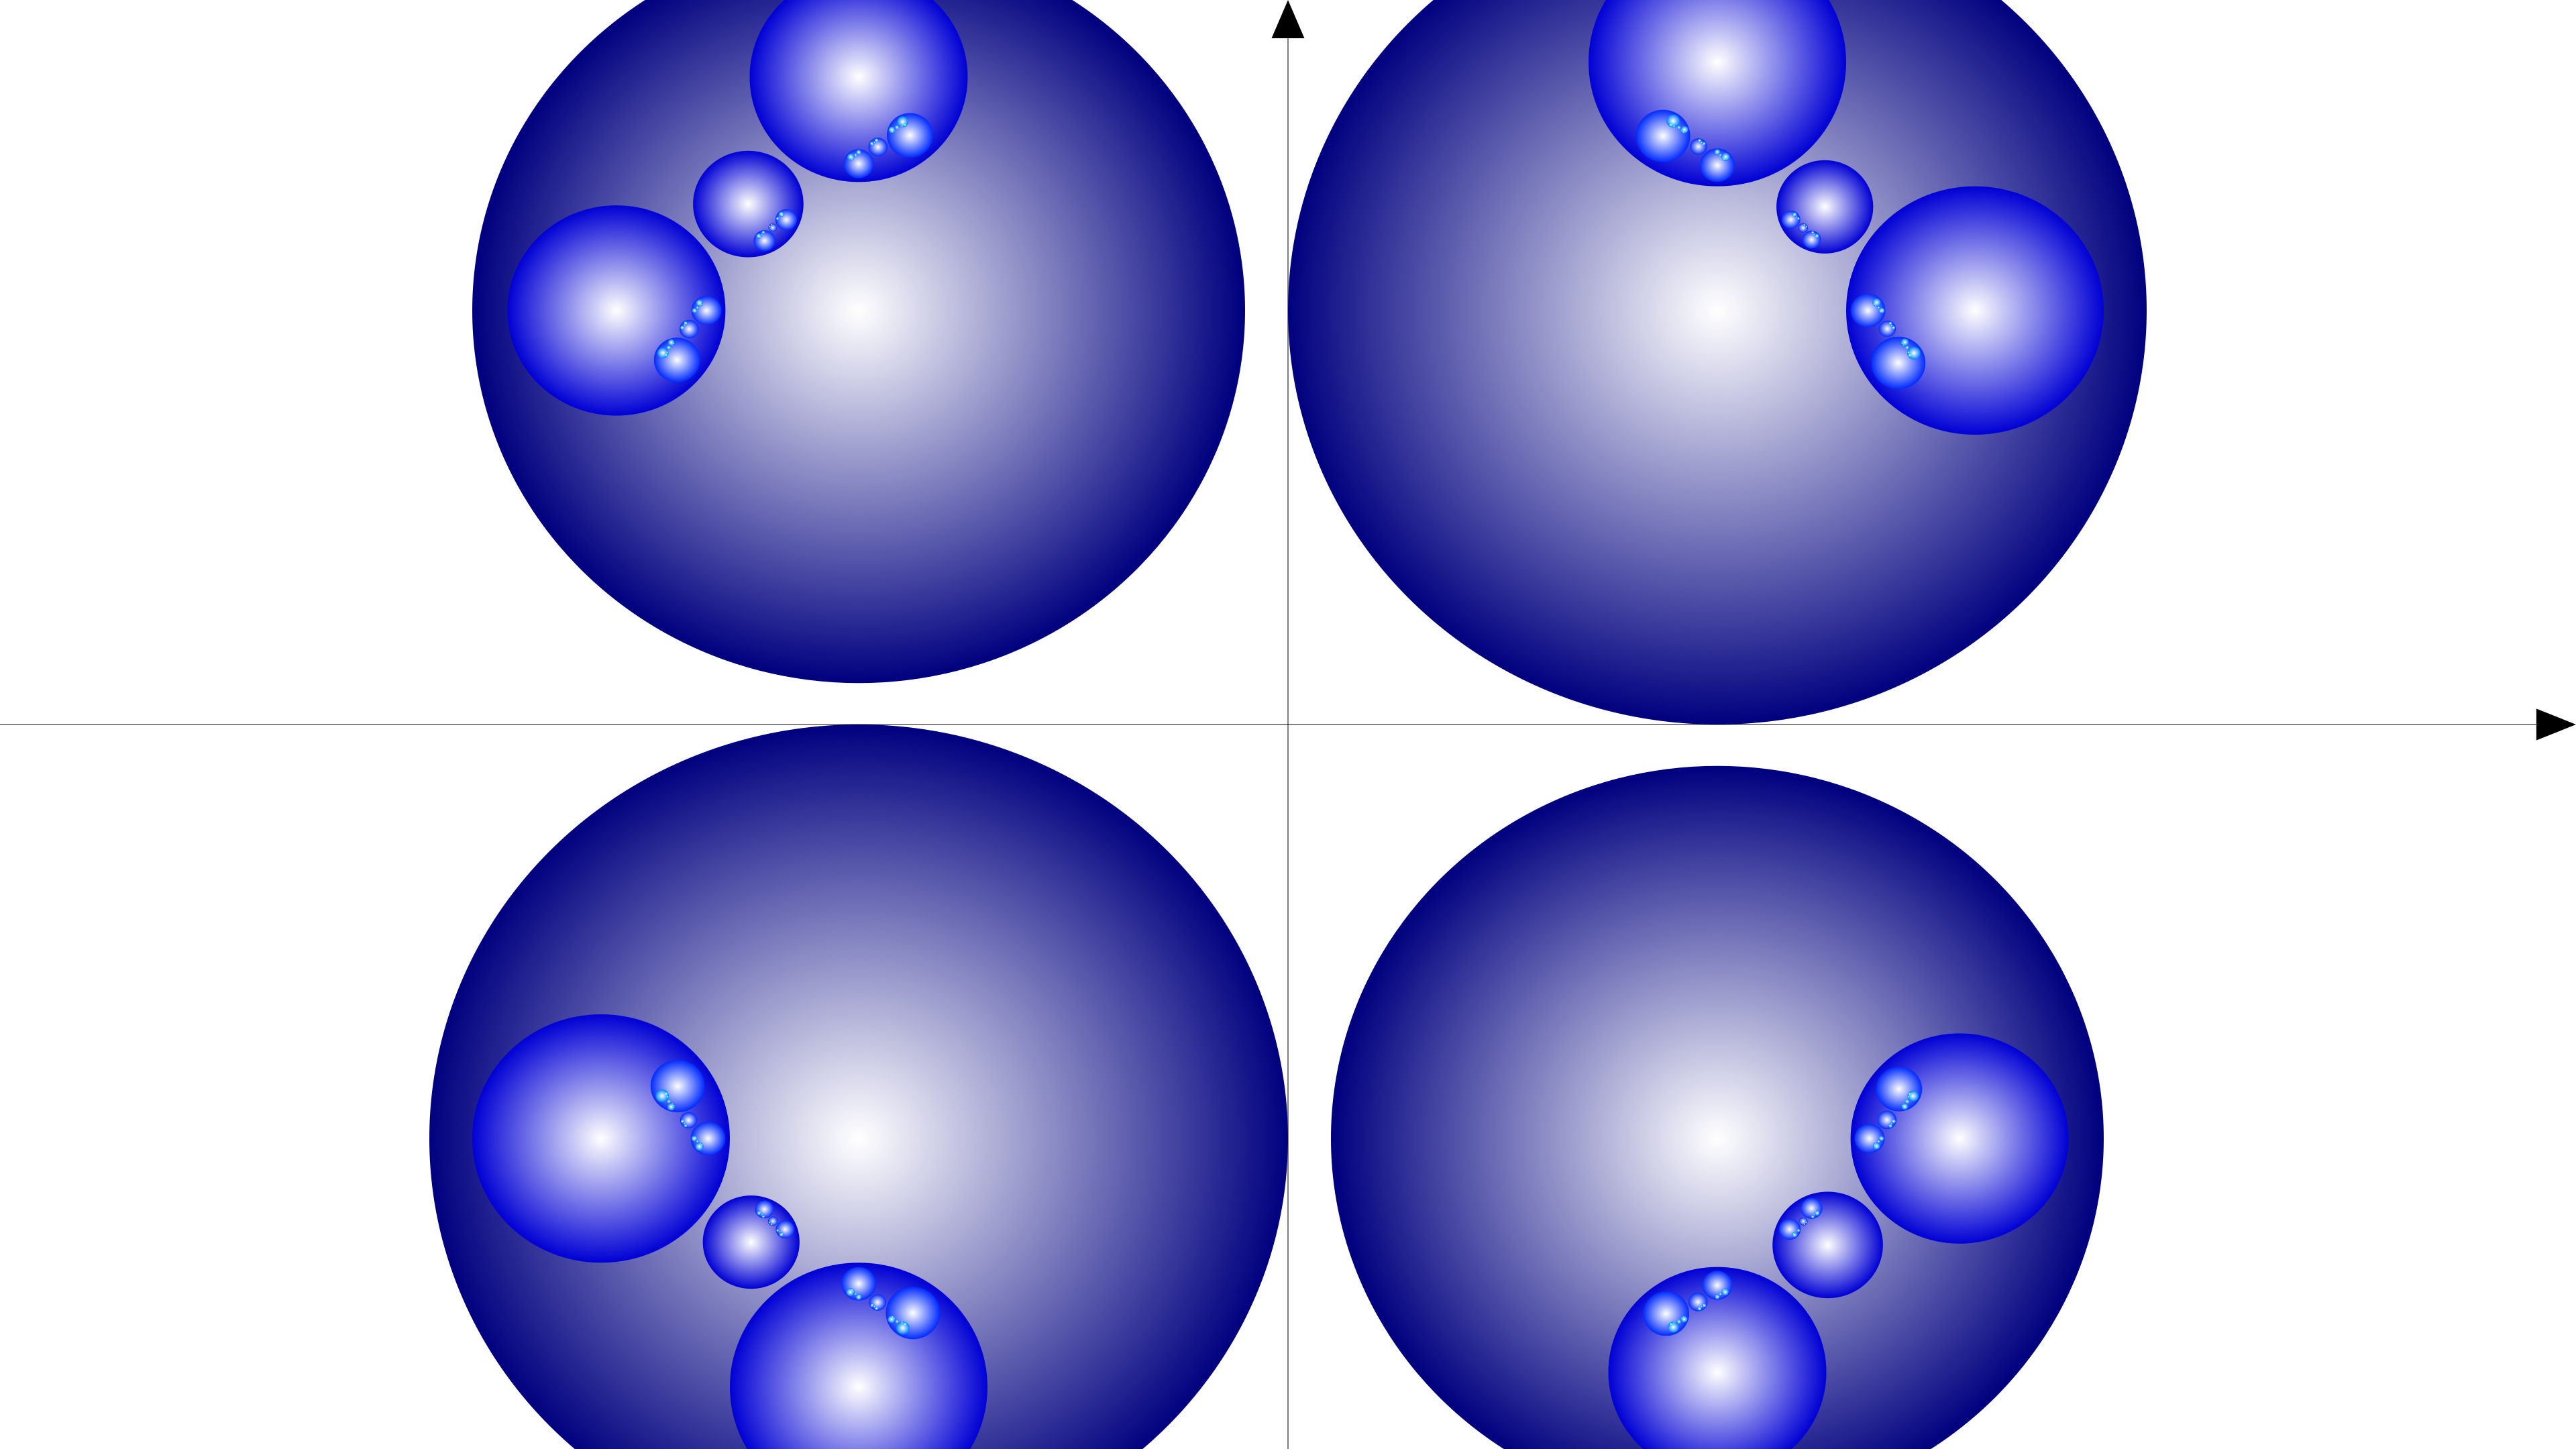

In [4]:
###################### Inciso 2 ######################
CA, Ca, CB, Cb = C1, C2, C3, C4

## Obteniendo los generados

a = createSchottkyGen(CA, Ca)
b = createSchottkyGen(CB, Cb)
A = inverse(a)
B = inverse(b)

## Dibujamos
@draw begin
    configurecanvas(-6, 6, -3.5, 3.5, width=w, height=h)
    drawSchottkyarraysBFS([a,b], [Ca,Cb,CA,CB], N=12, ε=0.0005, colormap=colorschemes[:jet])
end w h

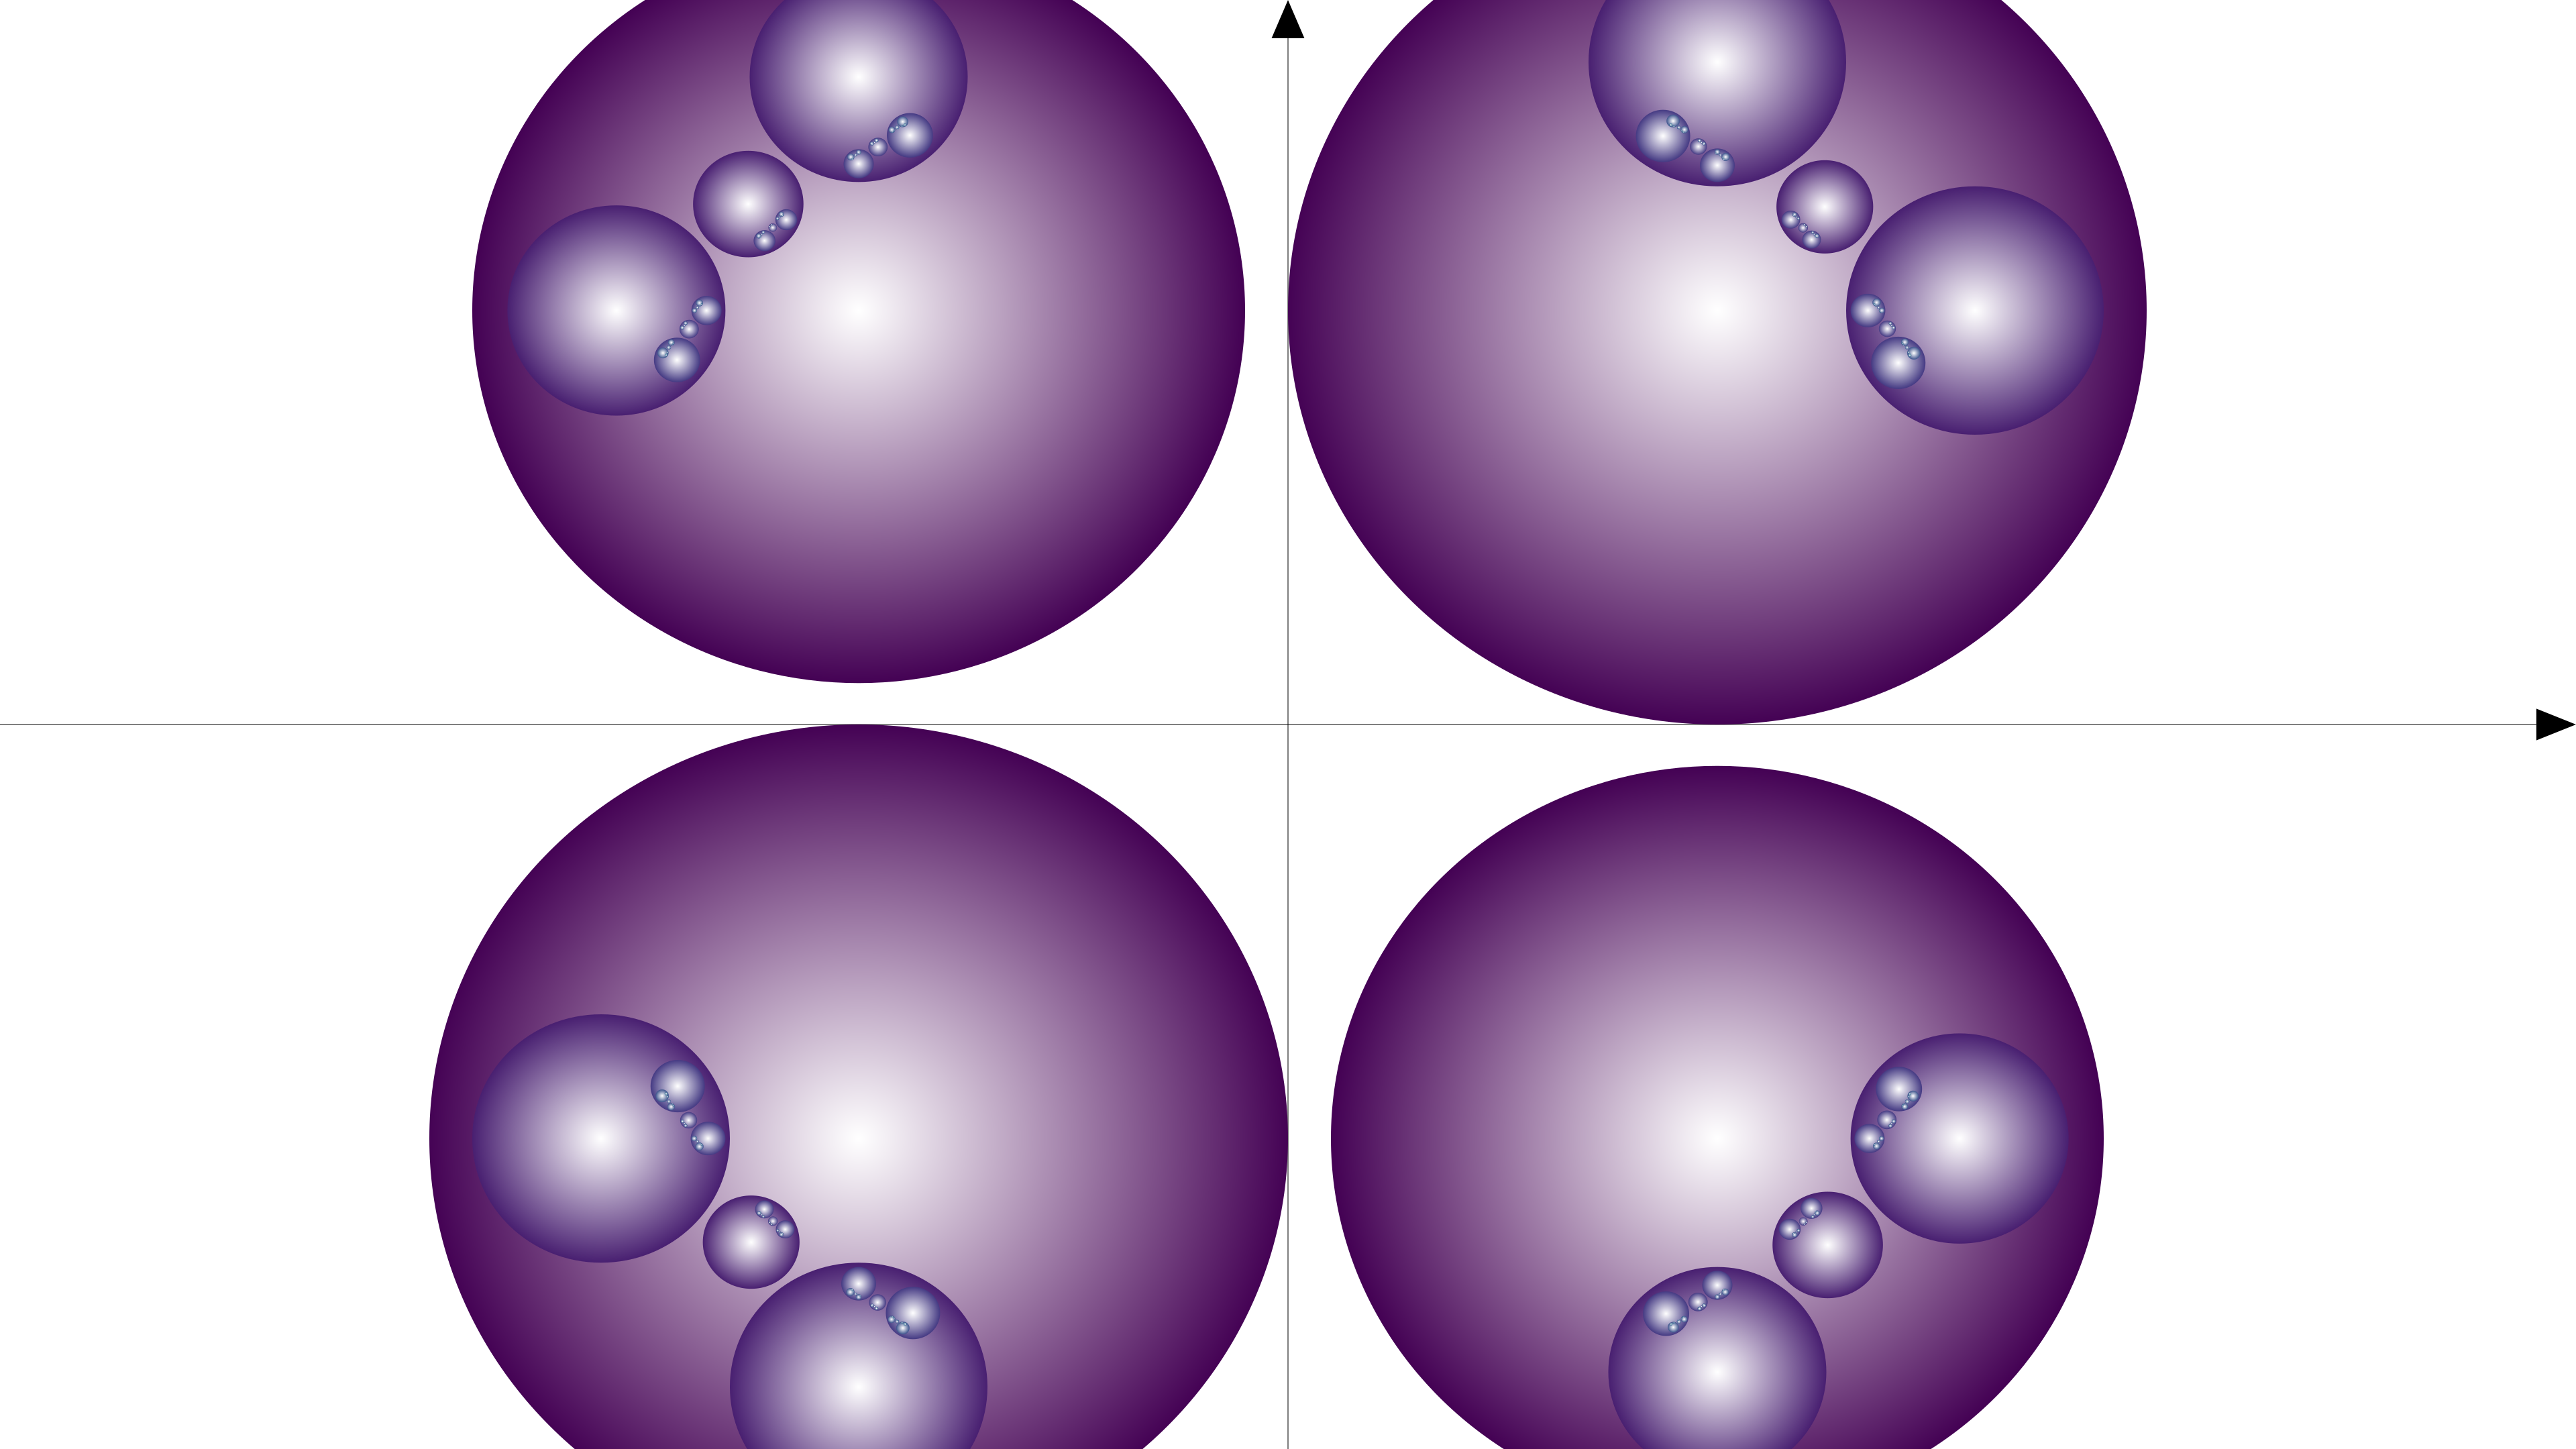

In [5]:
###################### Inciso 3 ######################
CA, Ca, CB, Cb = C1, C2, C4, C3

## Obteniendo los generados

a = createSchottkyGen(CA, Ca)
b = createSchottkyGen(CB, Cb)
A = inverse(a)
B = inverse(b)

## Obteniendo los discos

a_discs = a.([Ca,Cb,CB])
A_discs = A.([CA,Cb,CB])
b_discs = b.([Ca,CA,Cb])
B_discs = B.([Ca,CA,CB])

discos = [a_discs, A_discs, b_discs, B_discs]

## Dibujamos
@draw begin
    configurecanvas(-6, 6, -3.5, 3.5, width=w, height=h)
    drawSchottkyarraysBFS([a,b], [Ca,Cb,CA,CB], N=12, ε=0.0005, colormap=colorschemes[:viridis])
end w h